# Statistical Machine Learning Final Project: Customer Churn Prediction 🏦
### Authors: Sam Strickler, Ava Knight, Taylor, 

# ML Final Project: Customer Churn

**Goal:** Predict whether a bank customer will churn (close their account) and understand which features drive churn.  
**Data:** `customer_churn.csv` (10,000 customers, binary `churn` variable, mix of numeric + categorical predictors).  
**Task type:** Binary classification

In [6]:
# Load libraries
library(tidyverse)

df = read_csv("https://raw.githubusercontent.com/samstrc/StatML-Final-Proj/refs/heads/main/customer_churn.csv")
summary(df)

Rows: 10000 Columns: 12
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): country, gender
dbl (10): customer_id, credit_score, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  customer_id        credit_score     country             gender               age            tenure          balance       products_number
 Min.   :15565701   Min.   :350.0   Length:10000       Length:10000       Min.   :18.00   Min.   : 0.000   Min.   :     0   Min.   :1.00   
 1st Qu.:15628528   1st Qu.:584.0   Class :character   Class :character   1st Qu.:32.00   1st Qu.: 3.000   1st Qu.:     0   1st Qu.:1.00   
 Median :15690738   Median :652.0   Mode  :character   Mode  :character   Median :37.00   Median : 5.000   Median : 97199   Median :1.00   
 Mean   :15690941   Mean   :650.5                                         Mean   :38.92   Mean   : 5.013   Mean   : 76486   Mean   :1.53   
 3rd Qu.:15753234   3rd Qu.:718.0                                         3rd Qu.:44.00   3rd Qu.: 7.000   3rd Qu.:127644   3rd Qu.:2.00   
 Max.   :15815690   Max.   :850.0                                         Max.   :92.00   Max.   :10.000   Max.   :250898   Max.   :4.00   
  credit_card     ac

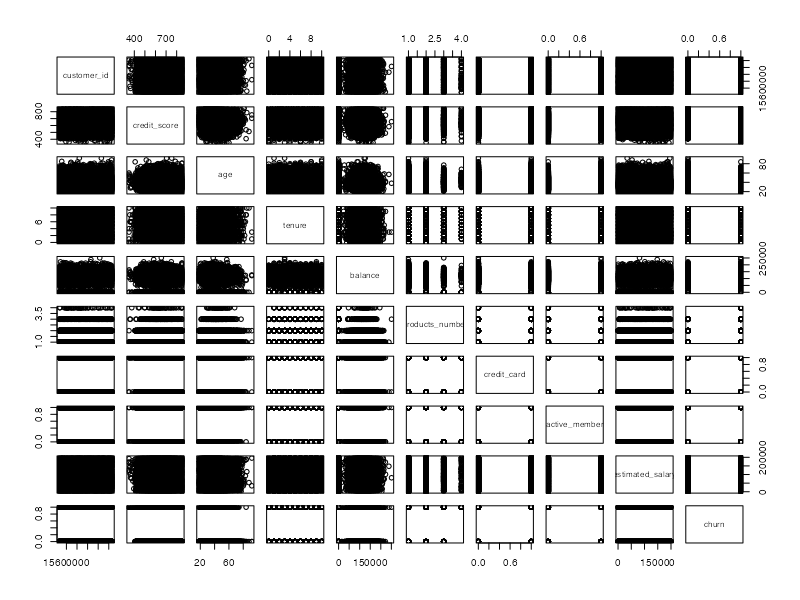

In [7]:
# DF: Only contains numeric variables
numeric_df <- df %>% select(where(is.numeric))

# Pair plots
pairs(numeric_df)

In [ ]:
# Libraries
packages <- c("tidyverse", "caret", "recipes", "janitor")
to_install <- packages[!packages %in% installed.packages()[, "Package"]]
if (length(to_install)) install.packages(to_install, repos = "https://cloud.r-project.org")

lapply(packages, library, character.only = TRUE)


# 1. Import + Clean Column Names
data <- read_csv(
  "~/Desktop/Bank Customer Churn Prediction.csv",
  skip = 1,              # <-- this skips the title row
  show_col_types = FALSE
) %>%
  janitor::clean_names()
glimpse(data)
names(data)


# 2. Drop ID Column
data <- data %>%
  select(-customer_id)


# 3. Make churn a factor
data <- data %>%
  mutate(churn = factor(churn, levels = c(0, 1), labels = c("No", "Yes")))


# 4. Train / Test Split (Stratified)
set.seed(123)

idx <- caret::createDataPartition(data$churn, p = 0.7, list = FALSE)

train <- data[idx, ]
test  <- data[-idx, ]

table(train$churn)


# 5. RECIPE FOR SVM / LINEAR MODELS
rec_svm <- recipe(churn ~ ., data = train) %>%
  step_zv(all_predictors()) %>%                     # remove zero-variance
  step_dummy(all_nominal_predictors()) %>%          # convert factors to dummy vars
  step_center(all_numeric_predictors()) %>%         # scale
  step_scale(all_numeric_predictors())

prep_svm <- prep(rec_svm)
train_svm <- bake(prep_svm, train)
test_svm  <- bake(prep_svm, test)


# 6. RECIPE FOR DECISION TREES
rec_tree <- recipe(churn ~ ., data = train) %>%
  step_zv(all_predictors()) %>%
  step_impute_mode(all_nominal_predictors()) %>%
  step_impute_median(all_numeric_predictors())

prep_tree <- prep(rec_tree)
train_tree <- bake(prep_tree, train)
test_tree  <- bake(prep_tree, test)


# 7. SAVE OUTPUTS
dir.create("prepared", showWarnings = FALSE)

write_csv(train_svm,  "prepared/train_svm.csv")
write_csv(test_svm,   "prepared/test_svm.csv")

write_csv(train_tree, "prepared/train_tree.csv")
write_csv(test_tree,  "prepared/test_tree.csv")

saveRDS(prep_svm,  "prepared/recipe_svm.rds")
saveRDS(prep_tree, "prepared/recipe_tree.rds")

cat("DONE! Files saved in /prepared folder\n")
